# Géneration d'un dataset "serie temporelle" et regression Linéaire

### Attention la régression linéaire ne se prête pas bien aux series temporelles

In [1]:
#Importation des librairies

#traitement des données
import pandas as pd 
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns   

#statistiques et régression
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [2]:

np.random.seed(1)


In [3]:
#créer des nombres aléatoires
data1= np.random.randn(20)

#generer des dates
date = pd.date_range(start= '1/1/2018', end = '31/1/2019',periods =20)
#créer un dataframe 
data_frame_1 = pd.DataFrame(data1,columns = ['valeur'], index=date)
print(data_frame_1)

                                 valeur
2018-01-01 00:00:00.000000000  1.624345
2018-01-21 18:56:50.526315776 -0.611756
2018-02-11 13:53:41.052631552 -0.528172
2018-03-04 08:50:31.578947328 -1.072969
2018-03-25 03:47:22.105263104  0.865408
2018-04-14 22:44:12.631578880 -2.301539
2018-05-05 17:41:03.157894656  1.744812
2018-05-26 12:37:53.684210432 -0.761207
2018-06-16 07:34:44.210526208  0.319039
2018-07-07 02:31:34.736841984 -0.249370
2018-07-27 21:28:25.263158016  1.462108
2018-08-17 16:25:15.789473792 -2.060141
2018-09-07 11:22:06.315789568 -0.322417
2018-09-28 06:18:56.842105344 -0.384054
2018-10-19 01:15:47.368421120  1.133769
2018-11-08 20:12:37.894736896 -1.099891
2018-11-29 15:09:28.421052672 -0.172428
2018-12-20 10:06:18.947368448 -0.877858
2019-01-10 05:03:09.473684224  0.042214
2019-01-31 00:00:00.000000000  0.582815


In [4]:
#génerer une serie temporelle aleatoire qui suit une loi normale (avec random.rand)

data = 4 * np.random.randn(100) + 68
tidx = pd.date_range(start = '1/1/2019', end = '31/12/2019',periods = 100)
data_frame = pd.DataFrame(data,columns = ['valeur'],index=tidx)
data_frame.index.name = 'date'

print(data_frame)

                                  valeur
date                                    
2019-01-01 00:00:00.000000000  63.597523
2019-01-04 16:14:32.727272704  72.578895
2019-01-08 08:29:05.454545408  71.606363
2019-01-12 00:43:38.181818112  70.009977
2019-01-15 16:58:10.909090816  71.603424
2019-01-19 09:12:43.636363520  65.265089
2019-01-23 01:27:16.363636480  67.508439
2019-01-26 17:41:49.090909184  64.256922
2019-01-30 09:56:21.818181888  66.928448
2019-02-03 02:10:54.545454592  70.121422
2019-02-06 18:25:27.272727296  65.233357
2019-02-10 10:40:00.000000000  66.412986
2019-02-14 02:54:32.727272704  65.251309
2019-02-17 19:09:05.454545408  64.619177
2019-02-21 11:23:38.181818112  65.315015
2019-02-25 03:38:10.909090816  67.949342
2019-02-28 19:52:43.636363520  63.530759
2019-03-04 12:07:16.363636480  68.937663
2019-03-08 04:21:49.090909184  74.639209
2019-03-11 20:36:21.818181888  70.968177
2019-03-15 12:50:54.545454592  67.232658
2019-03-19 05:05:27.272727296  64.449484
2019-03-22 21:20

(array([0.01188276, 0.02376552, 0.05347242, 0.10100346, 0.09506208,
        0.13071036, 0.10100346, 0.04753104, 0.01782414, 0.01188276]),
 array([59.91119514, 61.59430579, 63.27741643, 64.96052708, 66.64363773,
        68.32674838, 70.00985903, 71.69296968, 73.37608033, 75.05919098,
        76.74230163]),
 <a list of 10 Patch objects>)

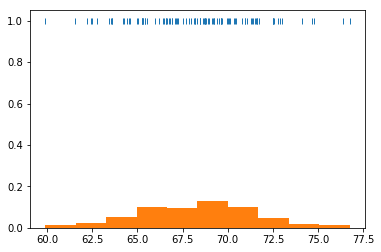

In [5]:
#essai de visualisation
plt.plot(data, np.ones_like(data), "|")
plt.hist(data, bins=10, density=1 )

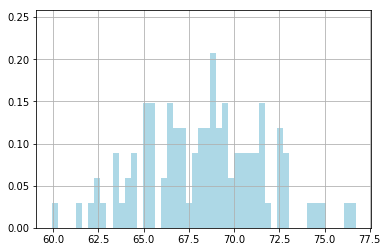

In [6]:
#visualisation de des nombres aléatoires

hx, hy, _ = plt.hist(data, bins=50, density=1,color="lightblue")
plt.ylim(0.0,max(hx)+0.05)
plt.xlim()
plt.grid()
plt.savefig("numpy_random_numbers_stantard_normal_distribution.png", bbox_inches='tight')


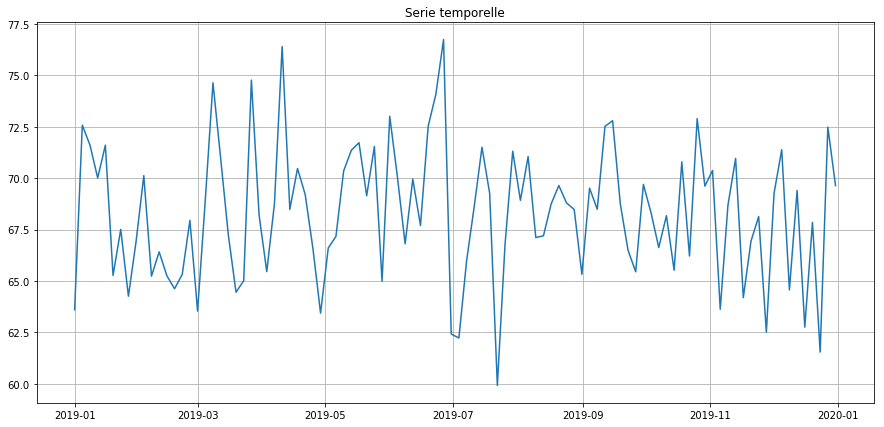

In [7]:
#visualisation de la serie temporelle
plt.figure(figsize=(15, 7))
plt.plot(data_frame)
plt.title('Serie temporelle')
plt.grid(True)
plt.show()


## Statistiques 

In [8]:
#moyenne globale
moyenne = data_frame.mean()
print(data_frame.mean())

valeur    68.278822
dtype: float64


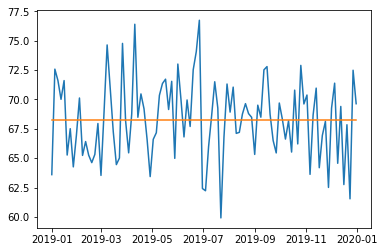

In [9]:
#il me faut une droite et pas seulement un point
moyenneglob = [data_frame.mean() for i in data]
type(moyenneglob)
#print(moyenneglob)
#visualisation
plt.plot(data_frame.index,data_frame.valeur)
plt.plot(data_frame.index, moyenneglob)
    


##  Regression Linéaire 


In [10]:
y = data_frame[['valeur']]
X = data_frame.index
print(X)

DatetimeIndex([          '2019-01-01 00:00:00',
               '2019-01-04 16:14:32.727272704',
               '2019-01-08 08:29:05.454545408',
               '2019-01-12 00:43:38.181818112',
               '2019-01-15 16:58:10.909090816',
               '2019-01-19 09:12:43.636363520',
               '2019-01-23 01:27:16.363636480',
               '2019-01-26 17:41:49.090909184',
               '2019-01-30 09:56:21.818181888',
               '2019-02-03 02:10:54.545454592',
               '2019-02-06 18:25:27.272727296',
                         '2019-02-10 10:40:00',
               '2019-02-14 02:54:32.727272704',
               '2019-02-17 19:09:05.454545408',
               '2019-02-21 11:23:38.181818112',
               '2019-02-25 03:38:10.909090816',
               '2019-02-28 19:52:43.636363520',
               '2019-03-04 12:07:16.363636480',
               '2019-03-08 04:21:49.090909184',
               '2019-03-11 20:36:21.818181888',
               '2019-03-15 12:50:54.5454

In [17]:
#faire un dataframe pour faire une régression car ne fonctionne pas avec l'index il faut convertir les dates en int
s = data_frame.index
data_frame['date_numeric'] =  pd.to_numeric(s)
data_frame.head()

,valeur,date_numeric
date,,
2019-01-01 00:00:00.000000000,63.597523,1546300800000000000
2019-01-04 16:14:32.727272704,72.578895,1546618472727272704
2019-01-08 08:29:05.454545408,71.606363,1546936145454545408
2019-01-12 00:43:38.181818112,70.009977,1547253818181818112
2019-01-15 16:58:10.909090816,71.603424,1547571490909090816


In [18]:
y = data_frame[['valeur']]
X = data_frame.date_numeric
print(X)

date
2019-01-01 00:00:00.000000000    1546300800000000000
2019-01-04 16:14:32.727272704    1546618472727272704
2019-01-08 08:29:05.454545408    1546936145454545408
2019-01-12 00:43:38.181818112    1547253818181818112
2019-01-15 16:58:10.909090816    1547571490909090816
2019-01-19 09:12:43.636363520    1547889163636363520
2019-01-23 01:27:16.363636480    1548206836363636480
2019-01-26 17:41:49.090909184    1548524509090909184
2019-01-30 09:56:21.818181888    1548842181818181888
2019-02-03 02:10:54.545454592    1549159854545454592
2019-02-06 18:25:27.272727296    1549477527272727296
2019-02-10 10:40:00.000000000    1549795200000000000
2019-02-14 02:54:32.727272704    1550112872727272704
2019-02-17 19:09:05.454545408    1550430545454545408
2019-02-21 11:23:38.181818112    1550748218181818112
2019-02-25 03:38:10.909090816    1551065890909090816
2019-02-28 19:52:43.636363520    1551383563636363520
2019-03-04 12:07:16.363636480    1551701236363636480
2019-03-08 04:21:49.090909184    15520189

In [19]:
model = sm.OLS(y, X)
results = model.fit()
# Avec  statsmodel, on a une sortie qui ressemble beaucoup à celle de R
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 valeur   R-squared:                      -0.023
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                      -inf
Date:                Sun, 16 Feb 2020   Prob (F-statistic):                nan
Time:                        10:07:47   Log-Likelihood:                -262.36
No. Observations:                 100   AIC:                             526.7
Df Residuals:                      99   BIC:                             529.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
date_numeric  4.371e-17   2.15e-19    203.661   

/home/fatima_moqran/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [21]:
#la prediction
y_hat = results.predict()
y_hat[:5]

array([67.5884845 , 67.60236991, 67.61625532, 67.63014072, 67.64402613])

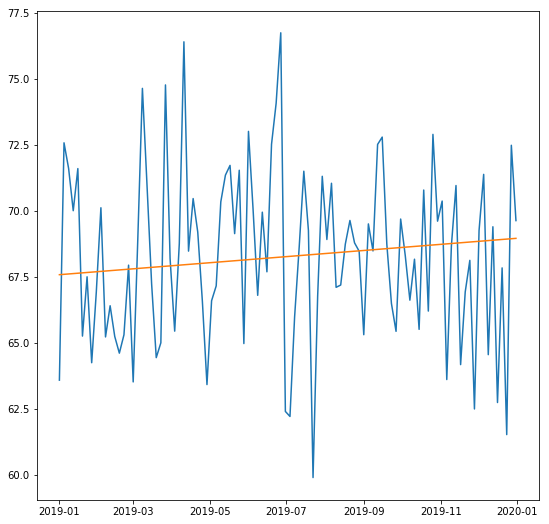

In [23]:
#plot la la prediction
plt.figure(figsize=(9,9))
plt.plot(X.index,y)
plt.plot(X.index,y_hat)